# 프린터

**문제 설명**

일반적인 프린터는 인쇄 요청이 들어온 순서대로 인쇄합니다. 그렇기 때문에 중요한 문서가 나중에 인쇄될 수 있습니다. 이런 문제를 보완하기 위해 중요도가 높은 문서를 먼저 인쇄하는 프린터를 개발했습니다. 이 새롭게 개발한 프린터는 아래와 같은 방식으로 인쇄 작업을 수행합니다.

    1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
    2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
    3. 그렇지 않으면 J를 인쇄합니다.

예를 들어, 4개의 문서(A, B, C, D)가 순서대로 인쇄 대기목록에 있고 중요도가 `2 1 3 2` 라면 `C D A B` 순으로 인쇄하게 됩니다.

내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 알고 싶습니다. 위의 예에서 `C`는 1번째로, `A`는 3번째로 인쇄됩니다.

현재 대기목록에 있는 문서의 중요도가 순서대로 담긴 배열 `priorities`와 내가 인쇄를 요청한 문서가 현재 대기목록의 어떤 위치에 있는지를 알려주는 `location`이 매개변수로 주어질 때, 내가 인쇄를 요청한 문서가 몇 번째로 인쇄되는지 return 하도록 solution 함수를 작성해주세요.

**제한사항**

- 현재 대기목록에는 1개 이상 100개 이하의 문서가 있습니다.
- 인쇄 작업의 중요도는 1~9로 표현하며 숫자가 클수록 중요하다는 뜻입니다.
- location은 0 이상 (현재 대기목록에 있는 작업 수 - 1) 이하의 값을 가지며 대기목록의 가장 앞에 있으면 0, 두 번째에 있으면 1로 표현합니다.


**입출력 예**

|priorities|	location|	return|
|:---:|:---:|:---:|
[2, 1, 3, 2]|	2|	1|
|[1, 1, 9, 1, 1, 1]	0|	5|

**입출력 예 설명**

예제 #1

문제에 나온 예와 같습니다.

예제 #2

6개의 문서(A, B, C, D, E, F)가 인쇄 대기목록에 있고 중요도가 1 1 9 1 1 1 이므로 C D E F A B 순으로 인쇄합니다.

In [10]:
from collections import deque

def solution(priorities, location):
    
    queue = deque()
    answer = []
    
    # (우선순위, 위치) 튜플로 변경
    for idx, priority in enumerate(priorities):
        queue.append((priority, idx))     

    while True:
        
        # 종료조건
        if len(answer) == len(priorities):
            break
            
        J = queue.popleft() # 현재 문서(J)
        flag = True # 우선순위 판단을 위한 flag
        
        for j in range(len(queue)): # 나머지 인쇄 대기목록

            # J보다 중요도가 높은 문서가 존재한다면 뒤로 넘긴다.
            if J[0] < queue[j][0]:
                queue.append(J)
                flag = False 
                break
            
        # 우선순위가 제일 높은 문서
        if flag:
            if J[1] == location:
                return len(answer) + 1
            else:
                answer.append(J) 

In [11]:
priorities= [2, 1, 3, 2]
solution(priorities, 2)

1

In [12]:
b = [1, 1, 9, 1, 1, 1]
solution(b,0)

5

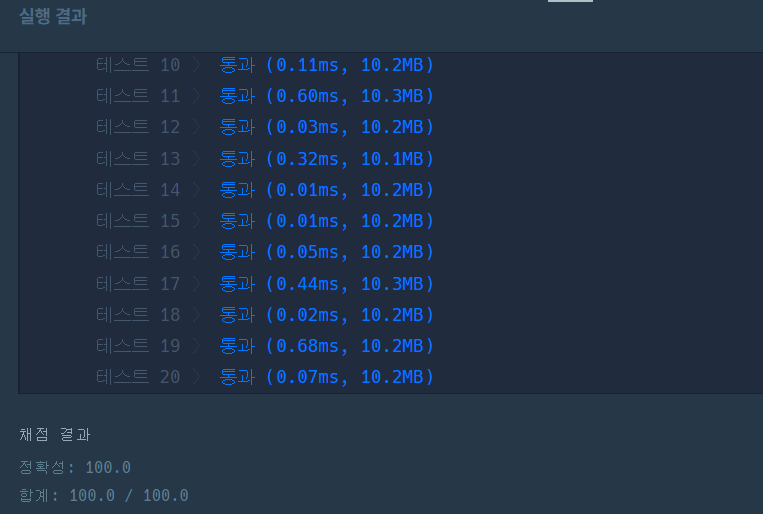

In [16]:
# 답안 1
from collections import deque

def solution(priorities, location):
    
    queue = deque()
    answer = []
    
    # (우선순위, 위치) 튜플로 변경
    
    queue = deque([(v,i) for i,v in enumerate(priorities)])
    while queue:
        
        J = queue.popleft() # 현재 문서(J)
        flag = True # 우선순위 판단을 위한 flag
        
        for j in range(len(queue)): # 나머지 인쇄 대기목록

            # J보다 중요도가 높은 문서가 존재한다면 뒤로 넘긴다.
            if J[0] < queue[j][0]:
                queue.append(J)
                flag = False 
                break
            
        # 우선순위가 제일 높은 문서
        if flag:
            if J[1] == location:
                return len(answer) + 1
            else:
                answer.append(J) 

In [17]:
priorities= [2, 1, 3, 2]
solution(priorities, 2)

1

In [18]:
b = [1, 1, 9, 1, 1, 1]
solution(b,0)

5

In [19]:
# 답안 2)
def solution(priorities, location):
    answer = 0
    while True:
        max_num = max(priorities) # 리스트에서 가장 큰수를 구한다.
        for i in range(len(priorities)): # 리스트를 처음부터 확인한다 
            if max_num == priorities[i]: # 만약 가장 큰 수와 리스트의 요소와 일치하면
                answer += 1 # 프린트한 것으로 간주하고 answer에 1 추가 
                priorities[i] = 0 # 프린트한 요소는 0으로 표시 
                max_num = max(priorities) # 가장 큰 수를 다시 구한다.
                if i == location: # 만약 location과 i가 일치하면 answer을 반환한다. 
                    return answer

- pop, append 등 불필요한 리스트 연산 코드를 빼고 
- 상수값을 변화시키면서 조건문을 통해 문제를 해결했다.

In [22]:
# 답안 2) - 속도 1등
def solution(p, l):
    ans = 0
    m = max(p)
    while True:
        v = p.pop(0)
        if m == v:
            ans += 1
            if l == 0:
                break
            else:
                l -= 1
            m = max(p)
        else:
            p.append(v)
            if l == 0:
                l = len(p)-1
            else:
                l -= 1
    return ans

- location 값을 줄여나가면서 for문을 사용하지 않고 문제를 해결하였다.
- 실행시간이 가장 빨랐다.

In [23]:


# 답안3 - 가독성 최상 성능 상타치
def solution(priorities, location):
    queue =  [(i,p) for i,p in enumerate(priorities)]
    answer = 0
    while True:
        cur = queue.pop(0)
        if any(cur[1] < q[1] for q in queue): # cur[1]가 가장 큰수가 아닐 경우 
            queue.append(cur)
        else: # cur[1]가 가장 큰수일 경우 
            answer += 1
            if cur[0] == location:
                return answer

In [25]:
from collections import deque

# 답안3 - 가독성 최상 성능 상타치
def solution(priorities, location):
    queue =  deque([(i,p) for i,p in enumerate(priorities)])
    answer = 0
    while True:
        cur = queue.popleft()
        if any(cur[1] < q[1] for q in queue): # cur[1]가 가장 큰수가 아닐 경우
            # if queue and cur[1] < max(queue)[1]
            queue.append(cur)
        else: # cur[1]가 가장 큰수일 경우 
            answer += 1
            if cur[0] == location:
                return answer

- any는 반복가능한(iterable) 객체를 인자로 받고 조건이 하나라도 참이면 True를 리턴하는 파이썬 내장함수이다.
- 성능도 좋지만 가독성이 아주 훌륭하다. 